In [1]:
#Importing the packages required
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor']='w'

# Brownian Oscillator

#### Main Equation ####

$$ m\frac{d^2x}{dt^2} + m\gamma\frac {dx}{dt} + kx = F$$

## Defining functions

In [2]:
#Defining the acceleration function to be used in the various integrators.
def acc(x, v, F):
    return ((-gamma*v) - ((k/m)*x) + F)

In [3]:
#Defining the euler integrator as a function that can be used to calculate one full trajectory
def euler(X0, V0, Tf, dt, F):
    N = int(Tf/dt)
    X = np.zeros(N+1, float)
    V = np.zeros(N+1, float)
    T = np.zeros(N+1, float)
    
    X[0] = X0
    V[0] = V0
    
    for n in range (1, N+1):
        T[n] = n*dt
        X[n] = X[n-1] + V[n-1]*dt
        V[n] = V[n-1] + acc(X[n], V[n-1], F[n-1])*dt
    
    return T, X, V

In [4]:
#Defining the leapfrog integrator. Outputs the time, the position and velocity at every timestep.
def leapfrog(X0, V0, Tf, dt, F):
    N = int(Tf/dt)
    X = np.zeros(N+1, float)
    V = np.zeros(N+1, float)
    T = np.zeros(N+1, float)
    
    X[0] = X0
    V[0] = (dt/2)*acc(X[0], V0, F[0])
    
    for n in range (1, N+1):
        T[n] = n*dt
        X[n] = X[n-1] + V[n-1]*dt
        V[n] = V[n-1] + acc(X[n], V[n-1], F[n-1])*dt
    
    return T, X, V

In [3]:
#Defining the leapfrog integrator. Outputs the time, the position and velocity at every timestep.
def rk4(X0, V0, Tf, dt, F):
    N = int(Tf/dt)
    X = np.zeros(N+1, float)
    V = np.zeros(N+1, float)
    T = np.zeros(N+1, float)
    
    X[0] = X0
    V[0] = V0
    
    for n in range (1, N+1):
        T[n] = n*dt
        x0 = X[n-1]
        v0 = V[n-1]
        h = dt
        
        k1x = v0
        k1v = acc(x0, v0, F[n-1])
        k2x = v0 + (k1v*h/2)
        k2v = acc((x0 + (k1x*h/2)), (v0 + (k1v*h/2)), F[n-1])
        k3x = v0 + (k2v*h/2)
        k3v = acc((x0 + (k2x*h/2)), (v0 + (k2v*h/2)), F[n-1])
        k4x = v0 + (k3v*h)
        k4v = acc(x0 + (k3x*h), v0 + (k3v*h), F[n-1])
        
        X[n] = x0 + (dt*(k1x + 2*k2x + 2*k3x + k4x)/6)
        V[n] = v0 + (dt*(k1v + 2*k2v + 2*k3v + k4v)/6)
    
    return T, X, V

In [6]:
#Defining the total energy of an oscillating particle (KE + PE) to calculate energy conservation
def energy(x, v, m, k):
    return ((0.5*m*(v**2)) + (0.5*k*(x**2)))

In [19]:
#Generating a list of random numbers using two generators-= Gaussian distribution and uniform distribution
Fgauss = np.random.normal(0.5, 0.1, size = 10000)
Funi = np.random.uniform(size = 10000)

## Simple harmonic Oscillator

$$ x(t) = \cos{(\sqrt{\frac{k}{m}}t)}$$

In [21]:
#Simple Harmonic Oscillator
#Defining the spring constant(k), mass of the particle (m), the damping constant (gamma), total time (Final), and time step (dt)
k = 1
m = 1
gamma = 0
Final = 20
dt = 0.1
N = int(Final/dt)
F = np.zeros(N+1, float)

#Generating the trajectory from the given constants, using the three integrators.
te, xe, ve = euler(1, 0, Final, dt, F)
tl, xl, vl = leapfrog(1, 0, Final, dt, F)
tr, xr, vr = rk4(1, 0, Final, dt, F)

exact = np.cos(np.sqrt(k/m)*te)

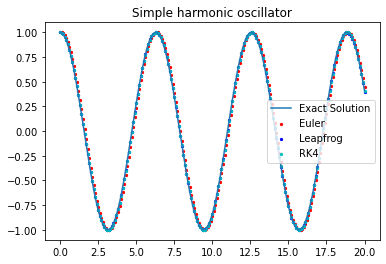

In [22]:
plt.plot(te, exact, label = 'Exact Solution')
plt.scatter(te, xe, color='r', s=5, label = 'Euler')
plt.scatter(tl, xl, color='b', s=5, label = 'Leapfrog')
plt.scatter(tr, xr, color='c', s=5, label = 'RK4')
plt.title("Simple harmonic oscillator")
plt.legend()
plt.show()

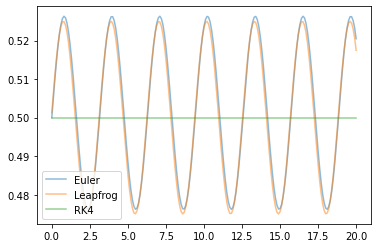

In [23]:
#Calculating the energy of the particle for the trajectory generated by each integrator.
Ee = energy(xe, ve, m, k)
El = energy(xl, vl, m, k)
Er = energy(xr, vr, m, k)

plt.plot(te, Ee, alpha=0.5, label = 'Euler')
plt.plot(tl, El, alpha=0.5, label = 'Leapfrog')
plt.plot(tr, Er, alpha=0.5, label = 'RK4')
plt.legend()
plt.show()

In [24]:
#Energy conservation for SHM
#Euler
euler_i = 0.5*k*xe[0]**2 + 0.5*m*ve[0]**2
euler_f = 0.5*k*xe[N]**2 + 0.5*m*ve[N]**2
euler_diff = euler_f - euler_i

#Leapfrog
leap_i = 0.5*k*xl[0]**2 + 0.5*m*vl[0]**2
leap_f = 0.5*k*xl[N]**2 + 0.5*m*vl[N]**2
leap_diff = leap_f - leap_i

#RK4
rk4_i = 0.5*k*xr[0]**2 + 0.5*m*vr[0]**2
rk4_f = 0.5*k*xr[N]**2 + 0.5*m*vr[N]**2
rk4_diff = rk4_f - rk4_i

print("Energy difference for Euler method =", euler_diff)
print("Energy difference for Leapfrog method =", leap_diff)
print("Energy difference for RK4 method =", rk4_diff)

Energy difference for Euler method = 0.020474379277524046
Energy difference for Leapfrog method = 0.016225000348893293
Energy difference for RK4 method = -1.3871508627860685e-06


## Damped Harmonic Oscillator

$$ x(t) = e^{-\frac{1}{2}\gamma t} \cos{(\sqrt{\frac{k}{m}}t)}$$

In [25]:
# Damped Harmonic oscillator
#Defining the constants and generating the trajectories using three integrators. 
k = 1
m = 1
gamma = 0.05
Final = 100
dt = 0.1
N = int(Final/dt)
F = np.zeros(N+1, float)

te, xe, ve = euler(1, 0, Final, dt, F)
tl, xl, vl = leapfrog(1, 0, Final, dt, F)
tr, xr, vr = rk4(1, 0, Final, dt, F)

exact = np.exp(-gamma*te/2)*np.cos(np.sqrt(k/m)*te)

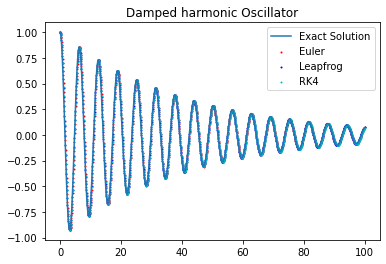

In [26]:
plt.plot(te, exact, label = 'Exact Solution')
plt.scatter(te, xe, color='r', s=1, label = 'Euler')
plt.scatter(tl, xl, color='b', s=1, label = 'Leapfrog')
plt.scatter(tr, xr, color='c', s=1, label = 'RK4')
plt.title("Damped harmonic Oscillator")
plt.legend()
plt.show()

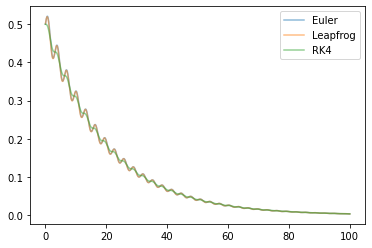

In [27]:
#Seeing how the energy of the particle as calculated by each integrator varies.
Ee = energy(xe, ve, m, k)
El = energy(xl, vl, m, k)
Er = energy(xr, vr, m, k)

plt.plot(te, Ee, alpha=0.5, label = 'Euler')
plt.plot(tl, El, alpha=0.5, label = 'Leapfrog')
plt.plot(tr, Er, alpha=0.5, label = 'RK4')
plt.legend()
plt.show()

## Forced Damped Harmonic oscillator

$$ \omega_d = \sqrt{\frac{k}{m} - \frac{\gamma^2}{4}}$$
$$ x(t) = A e^{-\frac{1}{2}\gamma t} \cos{(\omega_d t)}$$

In [12]:
#Forced damped harmonic oscillator with constant driving force

k = 1
m = 1
gamma = 0.05
Final = 200
dt = 0.1
N = int(Final/dt)
Force = 4
F = np.full(N+1, Force)

te, xe, ve = euler(1, 0, Final, dt, F)
tl, xl, vl = leapfrog(1, 0, Final, dt, F)
tr, xr, vr = rk4(1, 0, Final, dt, F)

#Defining the analytical solution for this system
omegad = np.sqrt((k/m)**2 - (gamma**2)/4)
A = 1 - (Force/k)
exact = A*np.exp(-gamma*te/2)*np.cos(omegad*te) + (Force/k)

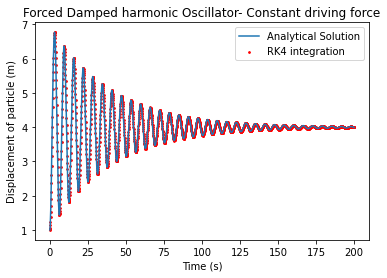

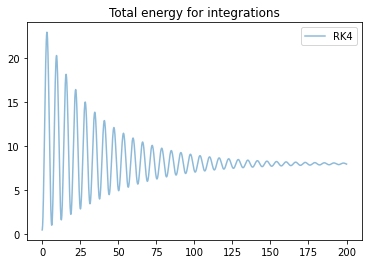

In [13]:
plt.plot(te, exact, label = 'Analytical Solution')

# plt.scatter(te, xe, color='r', s=1, label = 'Euler')
# plt.scatter(tl, xl, color='b', s=1, label = 'Leapfrog')
plt.scatter(tr, xr, color='r', s=3, label = 'RK4 integration')
plt.title("Forced Damped harmonic Oscillator- Constant driving force")
plt.xlabel("Time (s)")
plt.ylabel("Displacement of particle (m)")
plt.legend()
plt.show()

Ee = energy(xe, ve, m, k)
El = energy(xl, vl, m, k)
Er = energy(xr, vr, m, k)

# plt.plot(te, Ee, alpha=0.5, label = 'Euler')
# plt.plot(tl, El, alpha=0.5, label = 'Leapfrog')
plt.plot(tr, Er, alpha=0.5, label = 'RK4')
plt.legend()
plt.title("Total energy for integrations")
plt.show()

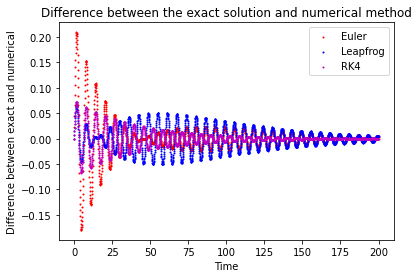

In [107]:
#Plotting the difference between each integration and the exact solution over time

diff_rk4=[a-b for a,b in zip(exact,xr)]
diff_rk4v=[a-b for a,b in zip(exactd,vr)]
diff_euler=[a-b for a,b in zip(exact,xe)]
diff_leap=[a-b for a,b in zip(exact,xl)]
diff_eulerv=[a-b for a,b in zip(exactd,ve)]
diff_leapv=[a-b for a,b in zip(exactd,vl)]
plt.scatter(tr, diff_euler, color='r', s=1, label = 'Euler')
plt.scatter(tr, diff_leap, color='b', s=1, label = 'Leapfrog')
plt.scatter(tr, diff_rk4, color='m', s=1, label = 'RK4')
plt.title("Difference between the exact solution and numerical method")
plt.ylabel("Difference between exact and numerical")
plt.xlabel("Time")
#plt.ylim(-0.005, 0.005)
plt.legend()
plt.show()

# plt.scatter(tr, diff_eulerv, color='r', s=1, label = 'Euler')
# plt.scatter(tr, diff_leapv, color='b', s=1, label = 'Leapfrog')
# plt.scatter(tr, diff_rk4v, color='m', s=1, label = 'RK4')
# plt.legend()
# plt.show()

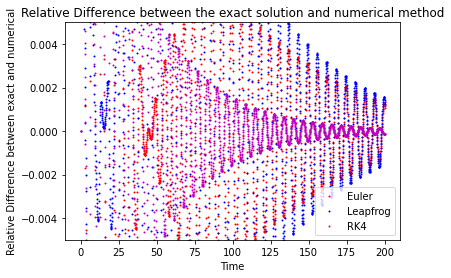

In [109]:
#Plotting the relative difference between each integration and the exact solution over time

ddiff_rk4=[(a-b)/a for a,b in zip(exact,xr)]

ddiff_euler=[(a-b)/a for a,b in zip(exact,xe)]
ddiff_leap=[(a-b)/a for a,b in zip(exact,xl)]

plt.scatter(tr, ddiff_euler, color='r', s=1, label = 'Euler')
plt.scatter(tr, ddiff_leap, color='b', s=1, label = 'Leapfrog')
plt.scatter(tr, ddiff_rk4, color='m', s=1, label = 'RK4')
plt.title("Relative Difference between the exact solution and numerical method")
plt.ylabel("Relative Difference between exact and numerical")
plt.xlabel("Time")
plt.ylim(-0.005, 0.005)
plt.legend()
plt.show()

## Forced Damped Harmonic oscillator- Sinusoidal

$$ F = F_0 \cos{(\omega_f t)}$$
$$ \omega_d = \sqrt{\frac{k}{m} - \frac{\gamma^2}{4}}$$
$$ B = \frac{F_0}{\sqrt{(\omega_0^2 - \omega_f^2)^2 + \gamma^2 \omega_f^2}}$$
$$ \phi = \tan^{-1}{\Bigl( \frac{-\gamma \omega_f}{\omega_0^2 - \omega_f^2}\Bigr)}$$
$$ x(t) = A e^{-\frac{1}{2}\gamma t} \cos{(\omega_d t + \theta)} + B \cos{(\omega_f t + \phi)}$$

In [8]:
#Forced damped harmonic oscillator with sinusoidal driving force
k = 1
m = 1
gamma = 0.05
Final = 200
dt = 0.1
t = np.arange(0, Final + dt, dt)
omega = 1.1
F0 =1
F = F0*np.cos(omega*t)

te, xe, ve = euler(1, 0, Final, dt, F)
tl, xl, vl = leapfrog(1, 0, Final, dt, F)
tr, xr, vr = rk4(1, 0, Final, dt, F)


#Defining the exact Solution for the same system
omega0 = np.sqrt(k/m)
omegad = np.sqrt(omega0**2 - ((gamma**2)/4))
amp=(F0)*(1/(np.sqrt((omega0**2 - omega**2)**2 + (gamma**2)*(omega**2))))
phi = np.arctan((-gamma*omega)/(omega0**2 - omega**2))

if (omega0<omega):
    phi = phi + np.pi

theta = np.arctan((-gamma/(2*omegad)) - (amp*omega*np.sin(phi))/(omegad*(1- amp*np.cos(phi))))

A = (1-(amp*np.cos(phi)))/np.cos(theta)

exact1 = amp*np.cos(omega*te + phi)
exact2 = A*np.exp(-gamma*te/2)*np.cos(omegad*te + theta)
exact = exact2 + exact1

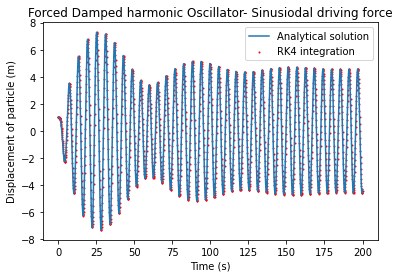

In [11]:
plt.plot(te,exact, label = "Analytical solution")

# plt.scatter(te, xe, color='r', s=1, label = 'Euler')
# plt.scatter(tl, xl, color='b', s=1, label = 'Leapfrog')
plt.scatter(tr, xr, color='r', s=1, label = 'RK4 integration')
plt.title("Forced Damped harmonic Oscillator- Sinusiodal driving force")
plt.xlabel("Time (s)")
plt.ylabel("Displacement of particle (m)")
plt.legend()
plt.show()

## Introducing Randomness

In [32]:
#Forced damped harmonic oscillator with a driving force generated from a gaussian distribution. This driving force is added at every time step.

k = 1
m = 1
gamma = 0.05
Final = 500
dt = 0.1
F = Fgauss

te, xe, ve = euler(1, 0, Final, dt, F)
tl, xl, vl = leapfrog(1, 0, Final, dt, F)
tr, xr, vr = rk4(1, 0, Final, dt, F)

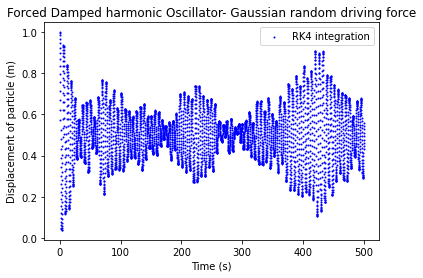

In [37]:
# plt.scatter(te, xe, color='r', s=1, label = 'Euler')
# plt.scatter(tl, xl, color='b', s=1, label = 'Leapfrog')
plt.scatter(tr, xr, color='b', s=1, label = 'RK4 integration')
plt.title("Forced Damped harmonic Oscillator- Gaussian random driving force")
plt.xlabel("Time (s)")
plt.ylabel("Displacement of particle (m)")
plt.legend()
plt.show()

In [34]:
#Forced damped harmonic oscillator with driving force generated by a uniform distribution

k = 1
m = 1
gamma = 0.05
Final = 200
dt = 0.1
F = Funi

te, xe, ve = euler(1, 0, Final, dt, F)
tl, xl, vl = leapfrog(1, 0, Final, dt, F)
tr, xr, vr = rk4(1, 0, Final, dt, F)

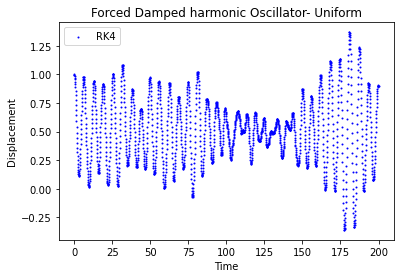

In [35]:
# plt.scatter(te, xe, color='r', s=1, label = 'Euler')
# plt.scatter(tl, xl, color='b', s=1, label = 'Leapfrog')
plt.scatter(tr, xr, color='b', s=1, label = 'RK4')
plt.title("Forced Damped harmonic Oscillator- Uniform")
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.legend()
plt.show()

# Averages of trajectories

In [36]:
%%time
#Calculating averages: Gaussian
#We want to take the averages over many trajectories , so for each time step that we plot, the displacement and velocity are the averages over many particles.

trials = 1000
k = 0
m = 1
gamma = 0
Final = 200
dt = 0.1
N = int(Final/dt) +1

#Defining the 2D arrays to contain the full trajectory for each trial of integration
X_val = np.zeros(shape=(trials, N))
Xsqr_val = np.zeros(shape=(trials, N))
V_val = np.zeros(shape=(trials, N))
Vsqr_val = np.zeros(shape=(trials, N))

#Looping for each particle/trajectory
for i in range (0, trials):
    F = np.random.normal(0, 1, size = N)
    tr, xr, vr = rk4(1, 0, Final, dt, F)
    #Adding each trajectory to the 2D array
    X_val[i] = xr
    V_val[i] = vr
    Xsqr_val[i] = np.square(xr)
    Vsqr_val[i] = np.square(vr)
    
#Summing over the columns and dividing by the number of trials to get the average of ech value.
X_avg = np.sum(X_val, axis=0) / trials
Xsqr_avg = np.sum(Xsqr_val, axis=0) / trials
V_avg = np.sum(V_val, axis=0) / trials
Vsqr_avg = np.sum(Vsqr_val, axis=0) / trials

CPU times: user 14.2 s, sys: 121 ms, total: 14.3 s
Wall time: 14.5 s


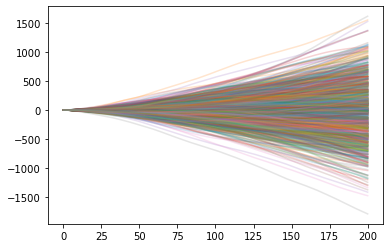

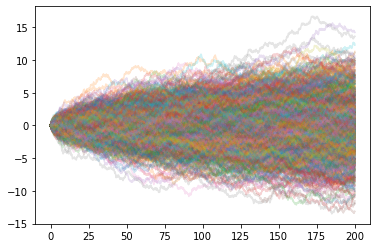

In [37]:
#Looping to display each displacement and velocity evolution
for i in range(0, len(X_val)):
    plt.plot(tr, X_val[i], alpha=0.2)
    
plt.show()

for i in range(0, len(V_val)):
    plt.plot(tr, V_val[i], alpha=0.2)
    
plt.show()

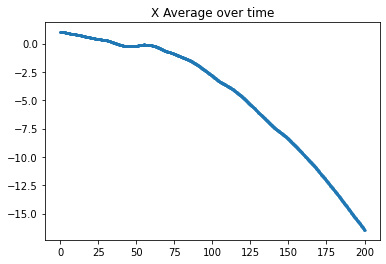

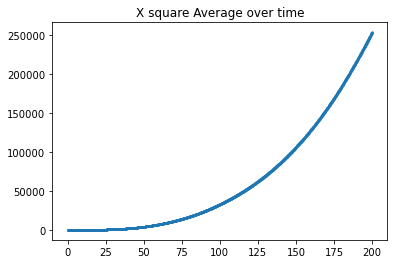

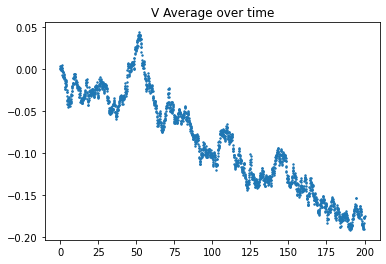

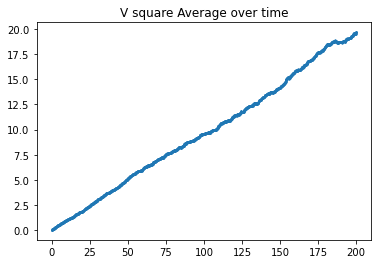

In [38]:
#Plotting the averages over time.
plt.scatter(tr, X_avg, s=2)
plt.title("X Average over time")
plt.show()

plt.scatter(tr, Xsqr_avg, s=2)
plt.title("X square Average over time")
plt.show()

plt.scatter(tr, V_avg, s=2)
plt.title("V Average over time")
plt.show()

plt.scatter(tr, Vsqr_avg, s=2)
plt.title("V square Average over time")
plt.show()

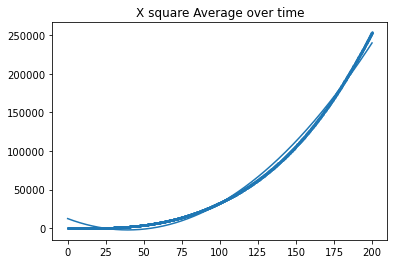

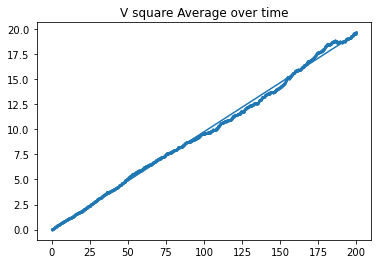

0.09795420392204016 -0.03455347781549823
9.400562078147997 -742.4302639564078 12434.705106890262


In [39]:
#Polyfit to get the equations that the averages follow. Quadratic for MSD, and linear for MSV

p,q,r = np.polyfit(tr, Xsqr_avg, 2)
Xsqr_avg_theory= [(p*x**2 + q*x + r) for x in tr]
m, c = np.polyfit(tr, Vsqr_avg, 1)
Vsqr_avg_theory= [(m*x + c) for x in tr]

plt.scatter(tr, Xsqr_avg, s=2)
plt.plot(tr, Xsqr_avg_theory)
plt.title("X square Average over time")
plt.show()

plt.scatter(tr, Vsqr_avg, s=2)
plt.plot(tr, Vsqr_avg_theory)
plt.title("V square Average over time")
plt.show()

print(m, c)
print(p, q, r)

# Differentiating over and under damped

In [40]:
%%time
#Calculating averages: Gaussian
#Calculating the average over trajectories for the underdamped case (gamma < 2*omega)

trials = 1000
k = 1
m = 1
gamma = 0.2
Final = 200
dt = 0.1
N = int(Final/dt) +1

X_val = np.zeros(shape=(trials, N))
Xsqr_val = np.zeros(shape=(trials, N))
V_val = np.zeros(shape=(trials, N))
Vsqr_val = np.zeros(shape=(trials, N))

for i in range (0, trials):
    F = np.random.normal(0, 1, size = N)
    tr, xr, vr = rk4(1, 0, Final, dt, F)
    X_val[i] = xr
    V_val[i] = vr
    Xsqr_val[i] = np.square(xr)
    Vsqr_val[i] = np.square(vr)
    
X_avg = np.sum(X_val, axis=0) / trials
Xsqr_avg = np.sum(Xsqr_val, axis=0) / trials
V_avg = np.sum(V_val, axis=0) / trials
Vsqr_avg = np.sum(Vsqr_val, axis=0) / trials

CPU times: user 13.1 s, sys: 93 ms, total: 13.2 s
Wall time: 13.3 s


$$ \text{Equation 24} $$

$$\frac{d^2 \langle x\rangle^2}{dt^2} + \beta\frac{d\langle x\rangle^2}{dt} + 2\omega^2\langle x\rangle^2 = 2\langle v\rangle^2$$

2001 2001 2001
-0.09485306074767941


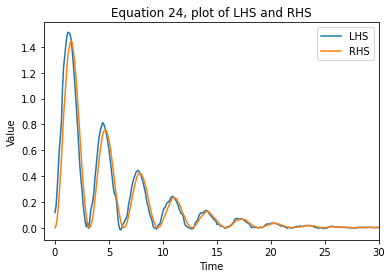

In [41]:
#Equation 24 from the paper by O Contreras
#Solving the equation using numerically calculated values of the derivatives, to check whether our code follows the same patterns as the paper.

_X_sqr = np.square(X_avg)
_V_sqr = np.square(V_avg)
dx = np.zeros(len(_X_sqr), float)
ddx = np.zeros(len(_X_sqr), float)
print(len(_X_sqr), len(dx), len(ddx))

for i in range (1, len(_X_sqr)):
    dx[i-1] = (_X_sqr[i] - _X_sqr[i-1])/dt
    
print(dx[0])
    
for i in range(1, len(dx)):
    ddx[i-1] = (dx[i] - dx[i-1])/dt
    
LHS = ddx + (gamma*dx) + ((2*_X_sqr*k)/m)
RHS = 2*_V_sqr

plt.plot(tr, LHS, label='LHS')
plt.plot(tr, RHS, label='RHS')
plt.title("Equation 24, plot of LHS and RHS")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.xlim(-1, 30)
plt.show()

0.2502039074191363 0.25021876211062366


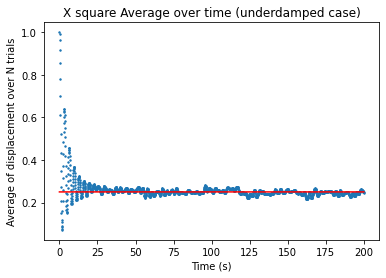

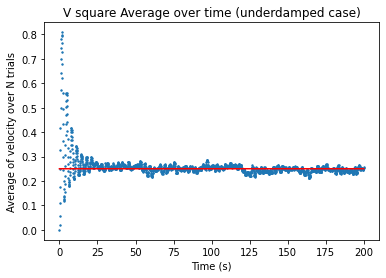

In [130]:
#Plotting the Mean squared average and mean squared velocity over time

## plt.scatter(tr, X_avg, s=2)
# plt.title("X Average over time")
# plt.show()
avg_1 = np.sum(Xsqr_avg[250:], axis=0)/len(Xsqr_avg[250:])
avg_2 = np.sum(Vsqr_avg[250:], axis=0)/len(Vsqr_avg[250:])

print(avg_1, avg_2)

plt.scatter(tr, Xsqr_avg, s=2)
plt.plot(tr, avg_1*(tr**0), color='red')
plt.title("X square Average over time (underdamped case)")
plt.xlabel("Time (s)")
plt.ylabel("Average of displacement over N trials")
plt.show()

# plt.scatter(tr, V_avg, s=2)
# plt.title("V Average over time")
# plt.show()

plt.scatter(tr, Vsqr_avg, s=2)
plt.plot(tr, avg_2*(tr**0), color='red')
plt.title("V square Average over time (underdamped case)")
plt.xlabel("Time (s)")
plt.ylabel("Average of velocity over N trials")
plt.show()

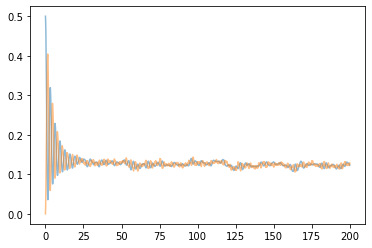

In [131]:
#Plotting the two energies of the system- kinetic energy and potential energy

a = 0.5*k*Xsqr_avg
b = 0.5*m*Vsqr_avg
plt.plot(tr, a, alpha=0.5)
plt.plot(tr, b, alpha=0.5)
plt.show()

# plt.plot(tr, a-b)
# plt.show()

# Under damped particle- alternate version

In [110]:
%%time
#Calculating averages: Gaussian

trials = 1000
k = 1
m = 1
gamma = 0.2
Final = 200
dt = 0.1
N = int(Final/dt) +1

X_val = np.zeros(shape=(trials, N))
Xsqr_val = np.zeros(shape=(trials, N))
V_val = np.zeros(shape=(trials, N))
Vsqr_val = np.zeros(shape=(trials, N))

for i in range (0, trials):
    F = np.random.normal(0, 1, size = N)
    tr, xr, vr = rk4(1, 0, Final, dt, F)
    X_val[i] = xr
    V_val[i] = vr
    Xsqr_val[i] = np.square(xr)
    Vsqr_val[i] = np.square(vr)
    C = np.multiply(vr, F)
    
X_avg = np.sum(X_val, axis=0) / trials
Xsqr_avg = np.sum(Xsqr_val, axis=0) / trials
V_avg = np.sum(V_val, axis=0) / trials
Vsqr_avg = np.sum(Vsqr_val, axis=0) / trials
C = np.sum(C, axis=0) / trials

CPU times: user 13 s, sys: 70.2 ms, total: 13 s
Wall time: 13.1 s


$$ \text{Equation 26} $$

$$\frac{d^2\sigma_x^2}{dt^2} + \beta\frac{d\sigma_x^2}{dt} + 2\omega^2\sigma_x^2 = 2\frac{k_B T}{m}$$

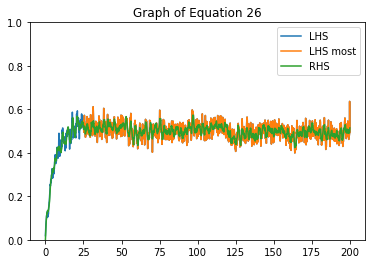

k_b*T/m =  0.24980720672892587
0.48878294781665704
1.7709527094806417e+22


In [133]:
#Equation 26
#Plotting the above equation using numerically calculated values of the standard deviation, to calculate a value of k_BT/m

var = Xsqr_avg - np.square(X_avg)
var_v = Vsqr_avg - np.square(V_avg)

dx = np.zeros(len(var), float)
ddx = np.zeros(len(var), float)

for i in range (1, len(var)):
    dx[i-1] = (var[i] - var[i-1])/dt
    
for i in range(1, len(dx)):
    ddx[i-1] = (dx[i] - dx[i-1])/dt
    
eqn = ddx + gamma*dx + 2*(k/m)*var
usable = eqn[250:]
tr_usable = tr[250:]

plt.plot(tr, eqn, label="LHS")
plt.plot(tr_usable, usable, label="LHS most")
plt.plot(tr, 2*var_v, label="RHS")
plt.ylim(0, 1)
plt.legend()
plt.title("Graph of Equation 26")
plt.show()


avg1 = np.sum(eqn, axis=0)/len(eqn)
avg2 = np.sum(2*var_v, axis=0)/len(var_v)
avg3 = np.sum(usable, axis=0)/len(usable)

print("k_b*T/m = ", avg3/2)
print(avg1)

T = (m*avg1)/(2*1.38*(10**(-23)))
print(T)

$$ \text{Checking Equipartition theorem} $$

$$\frac{1}{2}m\langle v\rangle^2 + \frac{1}{2}k\langle x\rangle^2 = k_B T$$

In [134]:
some = (0.5*k*avg_1) + (0.5*m*avg_2)
print("k_b*T/m from vsqr and xsqr= ", some)
print("k_b*T/m from eqn 26= ", avg3/2)
print("Relative error= ", (some-(avg3/2))*100/(avg3/2), "%")

k_b*T/m from vsqr and xsqr=  0.25021133476488
k_b*T/m from eqn 26=  0.24980720672892587
Relative error=  0.16177597165668042 %


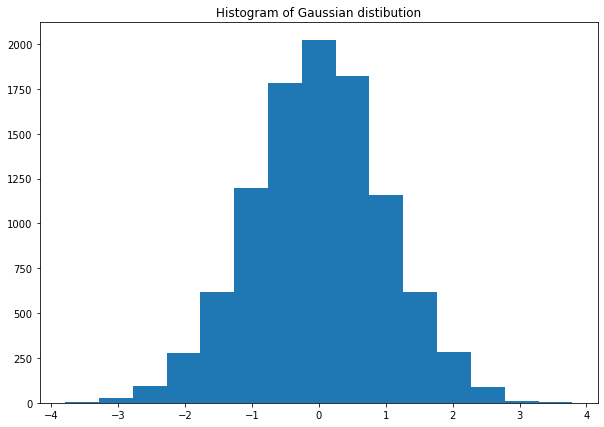

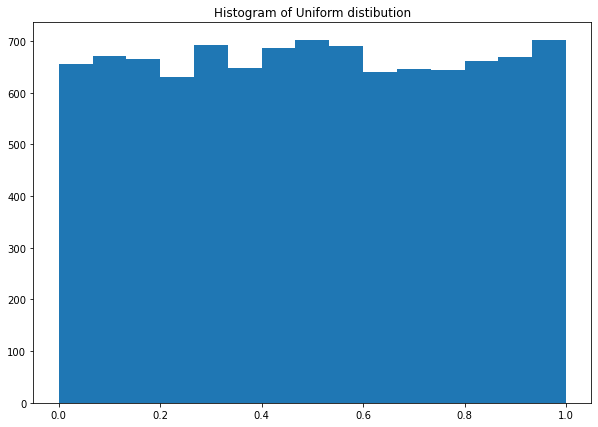

In [51]:
#Plotting histograms of the gaussian distribution and uniform distribution

Force = np.random.normal(0, 1, size = 10000)

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(Force, bins = 15)
plt.title("Histogram of Gaussian distibution")


Force2 = np.random.uniform(size = 10000)
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(Force2, bins = 15)

plt.title("Histogram of Uniform distibution")
plt.show()

# Extra graphs for forced damped harmonic

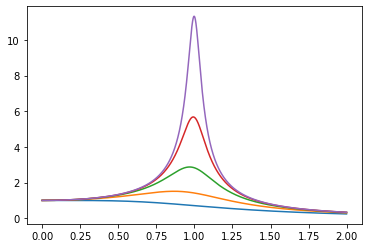

In [52]:
#Plotting the amplitude versus the ratio of the natural angular frequency to the driving angular frequency to observe resonance

def f(omega0, omega, gamma):
    return (omega0**2)/np.sqrt((omega0**2 - omega**2)**2 + (gamma*2)*(omega**2))

omegabyomega0 = np.arange(0, 2, 0.001)
gamma = 1
omega1 = 1
omega2 = 2
omega3 = 4
omega4 = 8
omega5 = 16

plt.plot(omegabyomega0, f(omega1, omegabyomega0*omega1, gamma))
plt.plot(omegabyomega0, f(omega2, omegabyomega0*omega2, gamma))
plt.plot(omegabyomega0, f(omega3, omegabyomega0*omega3, gamma))
plt.plot(omegabyomega0, f(omega4, omegabyomega0*omega4, gamma))
plt.plot(omegabyomega0, f(omega5, omegabyomega0*omega5, gamma))
plt.show()

/var/folders/bm/r_gc48bx4xz4t33vx7tjyhqw0000gq/T/ipykernel_17803/1692497186.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return np.arctan((gamma*omega)/(omega0**2 - omega**2)) / np.pi
/var/folders/bm/r_gc48bx4xz4t33vx7tjyhqw0000gq/T/ipykernel_17803/1692497186.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return np.arctan((gamma*omega)/(omega0**2 - omega**2)) / np.pi
/var/folders/bm/r_gc48bx4xz4t33vx7tjyhqw0000gq/T/ipykernel_17803/1692497186.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return np.arctan((gamma*omega)/(omega0**2 - omega**2)) / np.pi
/var/folders/bm/r_gc48bx4xz4t33vx7tjyhqw0000gq/T/ipykernel_17803/1692497186.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return np.arctan((gamma*omega)/(omega0**2 - omega**2)) / np.pi
/var/folders/bm/r_gc48bx4xz4t33vx7tjyhqw0000gq/T/ipykernel_17803/1692497186.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return np.arctan((gamma*omega)/(omega0

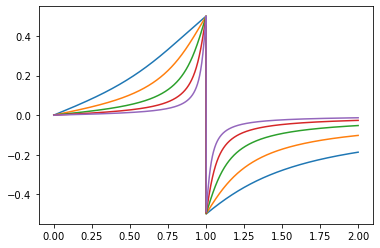

In [53]:
#Plotting the phase angle versus the same ratio

def g(omega0, omega, gamma):
    return np.arctan((gamma*omega)/(omega0**2 - omega**2)) / np.pi 
    
omegabyomega0 = np.arange(0, 2, 0.001)
gamma = 1
omega1 = 1
omega2 = 2
omega3 = 4
omega4 = 8
omega5 = 16

plt.plot(omegabyomega0, g(omega1, omegabyomega0*omega1, gamma))
plt.plot(omegabyomega0, g(omega2, omegabyomega0*omega2, gamma))
plt.plot(omegabyomega0, g(omega3, omegabyomega0*omega3, gamma))
plt.plot(omegabyomega0, g(omega4, omegabyomega0*omega4, gamma))
plt.plot(omegabyomega0, g(omega5, omegabyomega0*omega5, gamma))
plt.show()